<h1><center><b>Projet 7

<h2><center><b>Implementez un modèle de scoring

La société 'Prêt à dépenser' propose des crédits à la consommation pour des personnes ayant peu ou pas d'histoire de prêt.

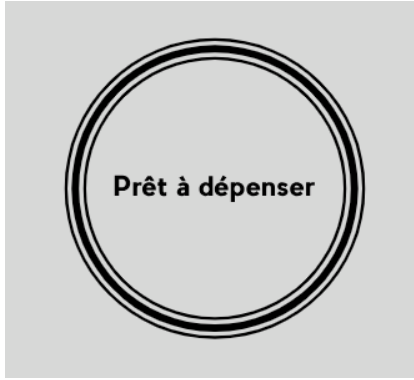

Afin de calculer la probabilité qu'un client rembourse ou non son crédit, un outil de "scoring crédit" est à étabilir. Un algorithme de classification basé sur les données variées permettra de décider si la demande de crédit et accordé ou refusé.

Les données sont disponibles à cette adresse:https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Impl%C3%A9menter+un+mod%C3%A8le+de+scoring/Projet+Mise+en+prod+-+home-credit-default-risk.zip

Afin que le modèle soit utilisé par les chargés de relation, un dashboard intéractif est à développer.

<b>Objectives:</b>

1) Construire un modèle qui prédit automatiquement la faillite d'un client.

2) Construire un dashboard interactif pour les chargés de relation d'interpréter les prédictions faite par le modèle.

Dans ce notebook, nous allons analyser les données et développer le modèle qui prédira la faillite d'un client.

Ce notebook sera divisé en 6 sections:

1) Importation/Lecture des données

2) Exploration des données

3) Sélection des variables pertinentes

4) Modélisation avec différents modèles

5) Amélioration du modèle.

6) Enregistrement des fichiers et des modèles

Nous commençons par accéder le bon dossier.

In [1]:
import os

os.chdir('Desktop/OC/Projet_7')

<h2><b>1. Importation des fichiers

Dans cette section, nous allons importer les différents dataframes. Ensuite, nous présentons la description de chaque dataframe. Enfin, nous comptons le nombre de données manquantes par colonne du dataframe principal 'application_train'. 

In [2]:
# Importation des libraries

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

Maintenant, nous importons les différents dataframes de la base de données.

<h3><b>1.1. Importation des dataframes

In [3]:
# Importation du dataframe 'application_train'

path_1 = 'application_train.csv'
application_train = pd.read_csv(path_1)
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Importation du dataframe 'application_test'

path_2 = 'application_test.csv'
application_test = pd.read_csv(path_2)
application_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [5]:
# Importation du dataframe 'sample_submission'

path_3 = 'sample_submission.csv'
sample_submission = pd.read_csv(path_3)
sample_submission

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5
...,...,...
48739,456221,0.5
48740,456222,0.5
48741,456223,0.5
48742,456224,0.5


In [6]:
# Importation du dataframe 'previous_application'

path_4 = 'previous_application.csv'
previous_application = pd.read_csv(path_4)
previous_application

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [7]:
# Importation du dataframe 'bureau'

path_5 = 'bureau.csv'
bureau = pd.read_csv(path_5)
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [8]:
# Importation du dataframe 'bureau_balance'

path_6 = 'bureau_balance.csv'
bureau_balance = pd.read_csv(path_6)
bureau_balance

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [9]:
# Importation du dataframe 'credit_card_balance'

path_7 = 'credit_card_balance.csv'
credit_card_balance = pd.read_csv(path_7)
credit_card_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [10]:
# Importation du dataframe 'cash_balance'

path_8 = 'POS_CASH_balance.csv'
cash_balance = pd.read_csv(path_8)
cash_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


In [11]:
# Importation du dataframe 'payments'

path_9 = 'installments_payments.csv'
payments = pd.read_csv(path_7)
payments

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [12]:
# Importation du dataframe 'descriptions'

path_10 = 'HomeCredit_columns_description.csv'
descriptions = pd.read_csv(path_10, encoding='ISO-8859-1')
descriptions

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


Nous avons réussi d'importer les 10 dataframes. Maintenant, nous affichons le nombre des lignes et colonnes dans chaque dataframe.

In [13]:
# La taille des différents dataframes.

print('La taille de chaque dataframe est donnée par:')
print('Taille de application_test - ', application_test.shape)
print('Taille de application_train - ', application_train.shape)
print('Taille de sample_submission - ', sample_submission.shape)
print('Taille de previous_application - ', previous_application.shape)
print('Taille de bureau - ', bureau.shape)
print('Taille de bureau_balance - ', bureau_balance.shape)
print('Taille de credit_card_balance - ', credit_card_balance.shape)
print('Taille de cash_balance - ', cash_balance.shape)
print('Taille de payments - ', payments.shape)
print('Taille de descriptions - ', descriptions.shape)

La taille de chaque dataframe est donnée par:
Taille de application_test -  (48744, 121)
Taille de application_train -  (307511, 122)
Taille de sample_submission -  (48744, 2)
Taille de previous_application -  (1670214, 37)
Taille de bureau -  (1716428, 17)
Taille de bureau_balance -  (27299925, 3)
Taille de credit_card_balance -  (3840312, 23)
Taille de cash_balance -  (10001358, 8)
Taille de payments -  (3840312, 23)
Taille de descriptions -  (219, 5)


<b><h3>1.2. Descriptions de chaque dataframe:</b>

<b>application_train:</b>

Ce dataframe est le dataframe le plus important parmi les différents dataframes. Nous utiliserons ce dataframe pour l'analsye et modélisation des données. Ce dataframe contient toutes les informations des clients où chaque ligne represente une prête d'argent. Ce dataframe contient la variable 'TARGET' qui indique si le client a remoboursé ou pas son prêt.

<b>application_test:</b>

Ce dataframe est similaire à l'application_train sauf la variable 'TARGET'. Compte tenu du fait que nous ne savons pas si les clients ont remboursé ou pas le prêt, nous n'utiliserons pas ce dataframe pour la modélisation. 

<b>sample_submission:</b>

Ce dataframe est un example des cibles à obtenir pour application_test.

<b>previous_application:</b>

Ce dataframe montre les données utilisées par l'application précédente afin d'évaluer la probabilité de faillite d'un client. 

<b>bureau:</b>

Ce dataframe contient les prêtes des clients des autres institutions et qui ont été reportés au bureau de crédit.

Le nombre des lignes dans le dataframe = Une ligne par nombre de prêtes par tous les clients.
        
<b>bureau_balance:</b>

Ce dataframe présente le nombre des mois que le client a failli de remboursé le prêt et si la demande de nouveau crédit a été accordé ou pas.

<b>cash_balance:</b>

Ce dataframe présente les informations sur le solde des prêtes des clients pour chaque mois.

<b>credit_card_balance:</b>

Ce dataframe présente les informations sur le solde des prêtes de crédits des clients pour chaque mois.

<b>payments:</b>

Ce dataframe présente chaque installement des paiements des clients.

<b>description:</b>

Ce dataframe contient les decriptions des différentes colonnes des dataframes.

Dans ce projet, nous utiliserons uniquement le dataframe 'application_train' pour l'analyse et la modélisation. Nous allons compter le nombre des variables catégorielles et numériques de ce dataframe. 

In [14]:
# Type des variables de l'application_train

var_cat = list(application_train.dtypes[application_train.dtypes == object].index)
var_num = list(application_train.dtypes[application_train.dtypes != object].index)
print("Le nombre de variables catégorielles sont:",len(var_cat))
print("Le nombre de variables numériques sont:", len(var_num))
print("Les variables catégorielles sont:")
print(var_cat)
print("Les variables numériques sont:")
print(var_num)

Le nombre de variables catégorielles sont: 16
Le nombre de variables numériques sont: 106
Les variables catégorielles sont:
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
Les variables numériques sont:
['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGIO

La variable 'TARGET' indique si le client a failli de rembourser le client ou pas. Nous allons compter le nombre des clients qui ont failli de rembourser le prêt (application_train['TARGET'] == 1).

0    282686
1     24825
Name: TARGET, dtype: int64

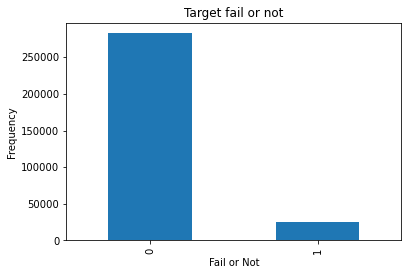

In [15]:
# Nombre de clients qui ont failli de rembourser le client

pd.value_counts(application_train['TARGET']).plot.bar()
plt.title('Target fail or not')
plt.xlabel('Fail or Not')
plt.ylabel('Frequency')
application_train['TARGET'].value_counts()

Dans le dataframe 'application_train', nous avons 307511 clients. Parmi ces clients, 24825 clients ont failli de rembourser le prêt d'argent.

Nous allons supprimer les variables et les dataframes que nous n'utiliserons pas afin de libérer de la mémoire.

<h3><b>1.3. Données manquantes du 'application_train'</b></h3>

Ensuite, nous présentrons les données manquantes par colonne du dataframe 'application_train'. Cette visualisation sera présentée en 5 parties compte tenu du fait que le dataframe contient beaucoup des colonnes.

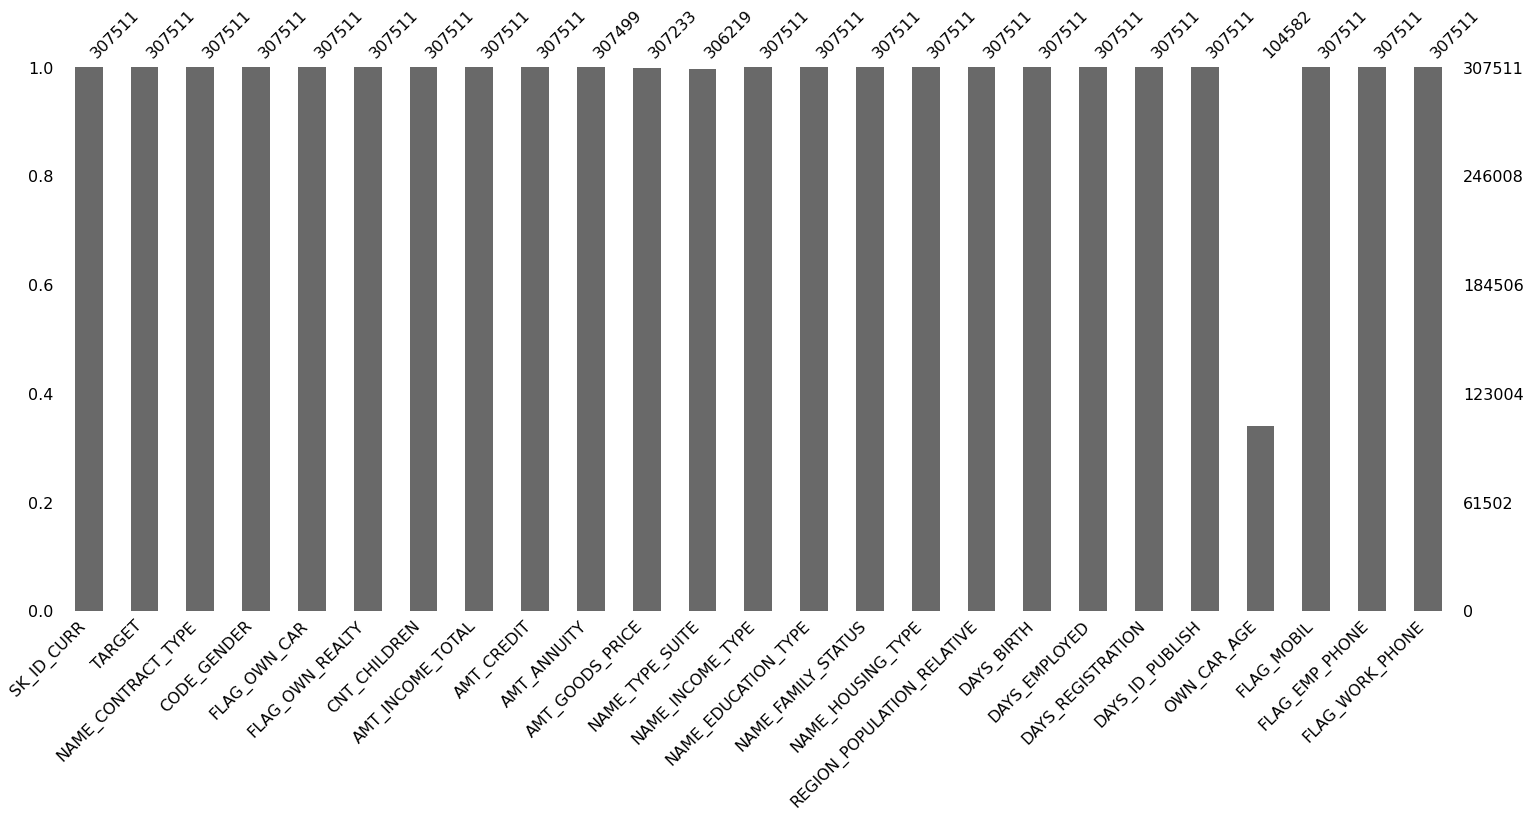

In [16]:
# Visualisation des données manquantes par colonne (1/5)

df1 = application_train.iloc[:, :25]
msno.bar(df1);

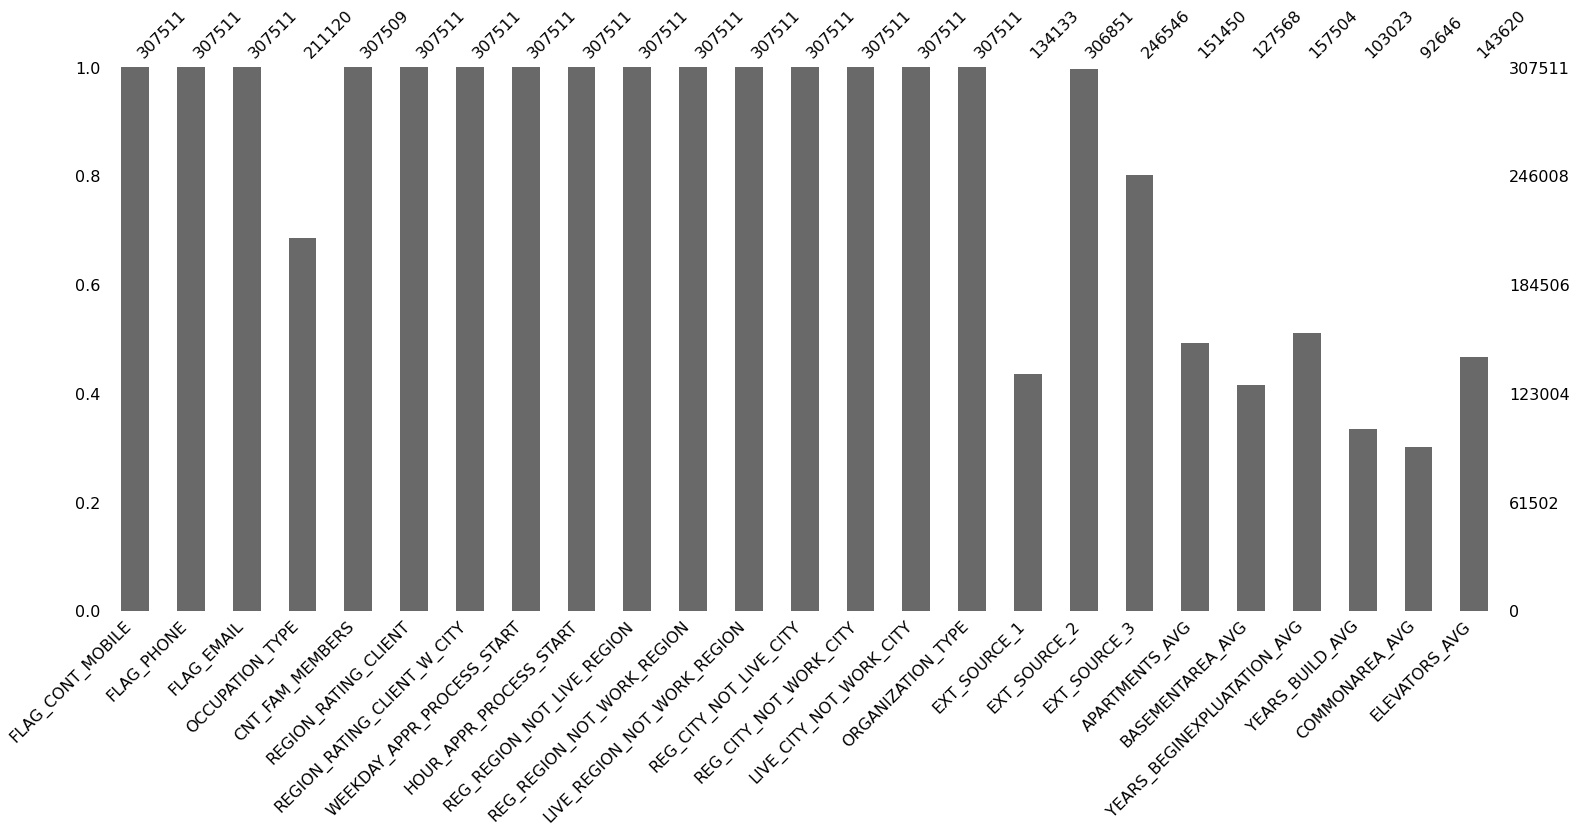

In [17]:
# Visualisation des données manquantes par colonne (2/5)

df2 = application_train.iloc[:, 25:50]
msno.bar(df2);

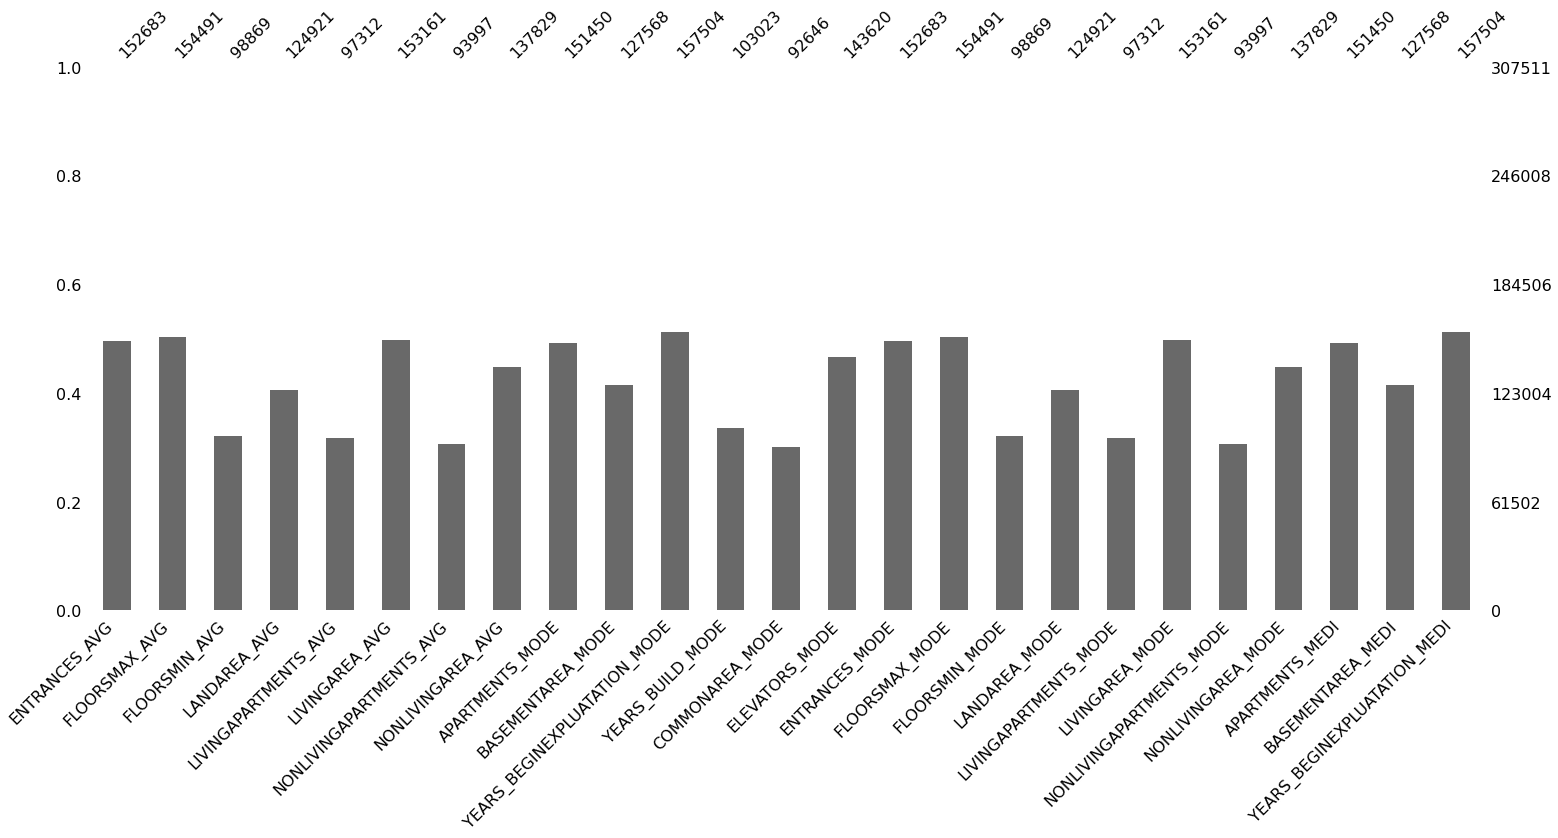

In [18]:
# Visualisation des données manquantes par colonne (3/5)

df3 = application_train.iloc[:, 50:75]
msno.bar(df3);

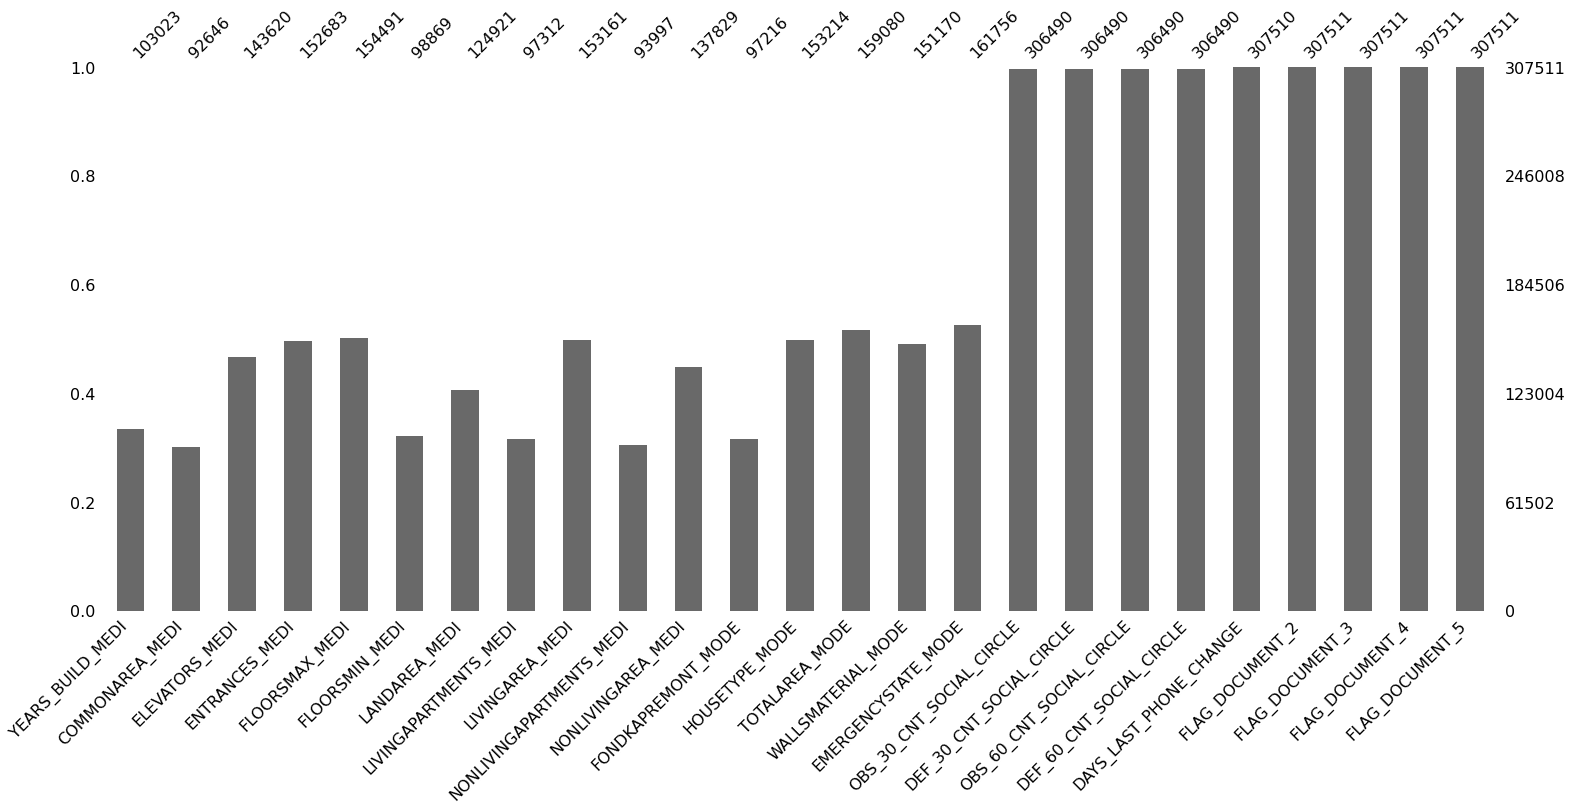

In [19]:
# Visualisation des données manquantes par colonne (4/5)

df4 = application_train.iloc[:, 75:100]
msno.bar(df4);

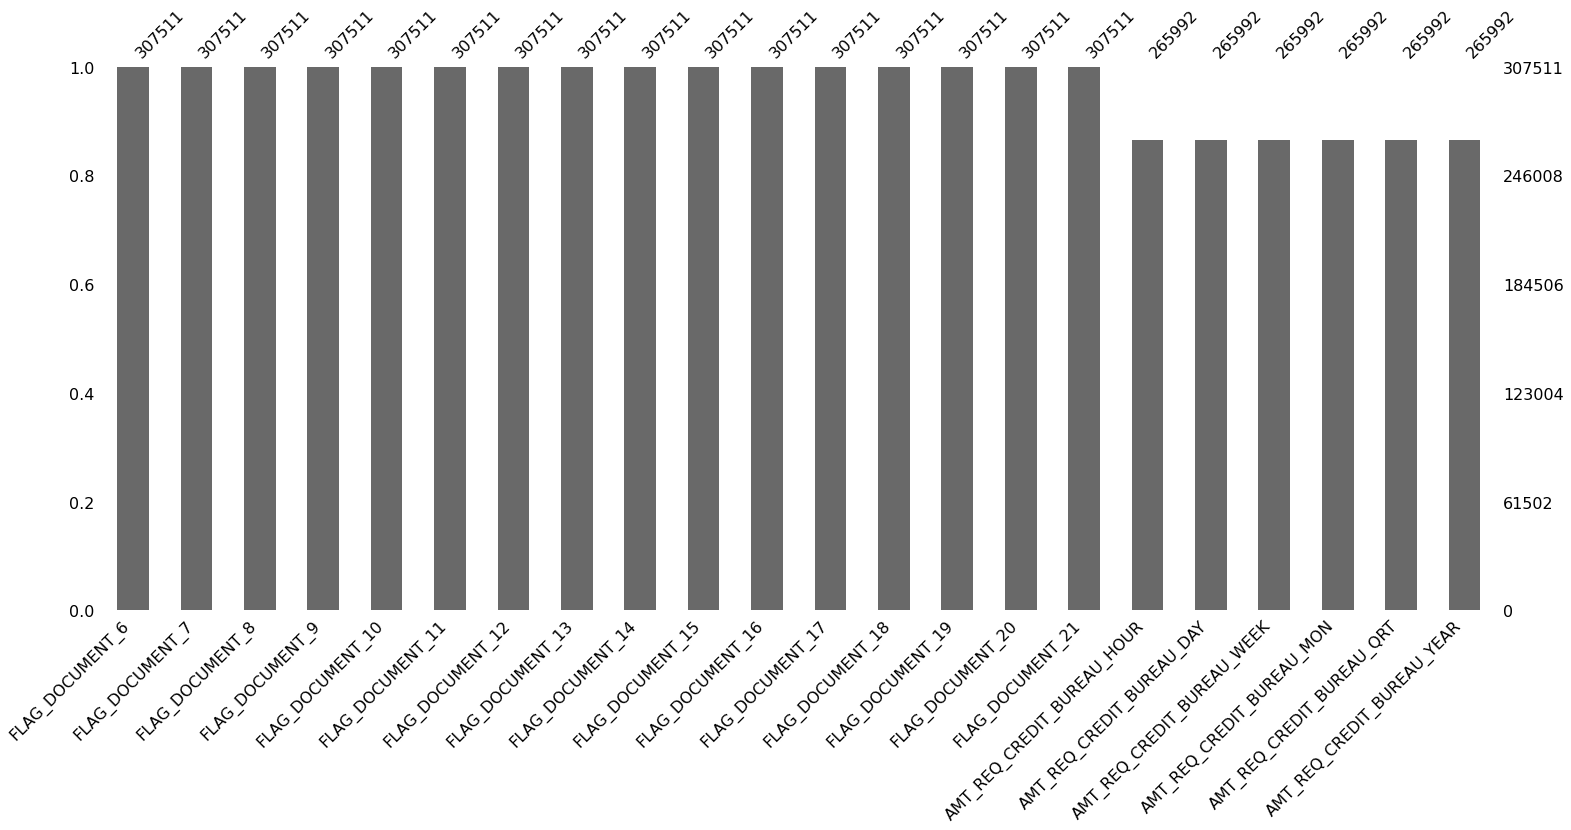

In [20]:
# Visualisation des données manquantes par colonne (5/5)

df5 = application_train.iloc[:, 100:]
msno.bar(df5);

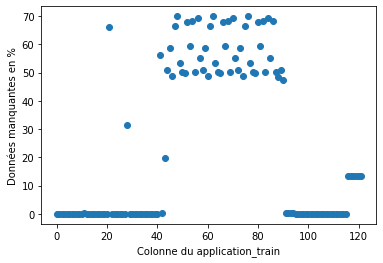

In [21]:
# Données manquantes en % par colonne du dataframe 'application_train'

cols = application_train.columns
missing_percent = []
for col in cols:
    missing_percent.append(application_train[col].isna().sum()*100/len(application_train))
list_of_tuples = list(zip(cols, missing_percent))

missing = pd.DataFrame(list_of_tuples, columns = ['Column', 'Missing_%'])
plt.xlabel('Colonne du application_train')
plt.ylabel('Données manquantes en %')
plt.scatter(missing.index, missing['Missing_%']);

In [22]:
# Liste des colonnes avec des données manquantes

missing = missing.sort_values(by = 'Missing_%', axis = 0, ascending=False)
missing = missing[missing['Missing_%'] > 0]
missing = missing.reset_index(drop = True)
missing_30 = missing[missing['Missing_%'] > 30]
missing

,Column,Missing_%
0,COMMONAREA_MEDI,69.872297
1,COMMONAREA_AVG,69.872297
2,COMMONAREA_MODE,69.872297
3,NONLIVINGAPARTMENTS_MODE,69.432963
4,NONLIVINGAPARTMENTS_AVG,69.432963
...,...,...
62,EXT_SOURCE_2,0.214626
63,AMT_GOODS_PRICE,0.090403
64,AMT_ANNUITY,0.003902
65,CNT_FAM_MEMBERS,0.000650


Donc, parmi les 122 colonnes du dataframe 'application_train', nous avons 50 colonnes avec plus de 30% des données manquantes. Au total, nous avons 67 colonnes avec des donées manquantes et 55 colonnes sans données manquantes.

In [23]:
# Suppression des variables et des dataframes afin de libérer de la mémoire

del missing
del missing_30
del cols
del df1
del df2
del df3
del df4
del df5
del application_test
del bureau
del bureau_balance
del credit_card_balance
del descriptions
del payments
del cash_balance
del previous_application
del sample_submission

<h2><b>2. Data Exploration

Dans cette section, nous allons exploré et traité les différentes variables du dataframe 'application_train'.

In [24]:
# Importation des libraries

import re
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

<h3><b>2.1. Exploration des variables</h3></b>

<b>Variable 'Enquiry'</b>

Les variables du type 'AMT_REQ...' représentent les nombre des fois qu'une enquête a été faite sur le client au bureau de crédit. Nous définissons une variable 'Enquiry' qui représente la somme totale des fois qu'une enquête a été effectué sur le client au cours d'un an.

In [25]:
# Définition de la variable 'Enquiry'

enquiry = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
           'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
application_train[enquiry] = application_train[enquiry].fillna(0, axis =1)
application_train['Enquiry'] = application_train[enquiry].sum(axis=1)
application_train = application_train.drop(enquiry, axis = 1)
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,Enquiry
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0,0,0,0,0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0,0,0,0,0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,0,0,0,0,0,3.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0,0,0,0,0,0.0


<b>Variable 'Documents'</b>

Les variables du type 'FLAG_DOCUMENT...' indique si le client a fourni le document correspondant ou pas. Nous définissons une variable 'Documents' qui représente le nombre de documents fournis par le client.

In [26]:
# Définition de la variable 'Documents'

documents = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
            'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
            'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
            'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
application_train[documents] = application_train[documents].fillna(0, axis =1)
application_train['Documents'] = application_train[documents].sum(axis=1)
application_train = application_train.drop(documents, axis = 1)
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Enquiry,Documents
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,1.0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0.0,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.2898,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,0.0,1
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0214,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0.0,1
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.7970,Panel,No,6.0,0.0,6.0,0.0,-1909.0,3.0,1
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0086,"Stone, brick",No,0.0,0.0,0.0,0.0,-322.0,0.0,1


<b>Variable 'Contact'</b>

Les variables 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE' et 'FLAG_EMAIL' indique si le client a laissé ce type d'information de contact au bureau de crédit. Nous définissons une variable 'Contact' qui représente le nombre des types d'information de contact laissé au bureau de crédit.

In [27]:
# Définition de la variable 'Contact'

contact = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']
application_train[contact] = application_train[contact].fillna(0, axis =1)
application_train['Contact'] = application_train[contact].sum(axis=1)
application_train = application_train.drop(contact, axis = 1)
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Enquiry,Documents,Contact
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,1.0,1,3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0,4
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0.0,1,2
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,0.0,1,2
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0.0,1,2
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,Panel,No,6.0,0.0,6.0,0.0,-1909.0,3.0,1,3
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,"Stone, brick",No,0.0,0.0,0.0,0.0,-322.0,0.0,1,2


<b>Variable représentées en jours</b>

Nous convertissons l'unité des variables représentées en 'jours' aux varunités représentées en 'années'.  

In [28]:
# Convertion aux unités de 'jour' à 'années'

year_convert = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']
application_train[year_convert] = application_train[year_convert]/365
application_train[year_convert] = abs(application_train[year_convert])

# Renommer les colonnes
application_train.rename(columns = {'DAYS_BIRTH':'YEARS_BIRTH', 'DAYS_EMPLOYED':'YEARS_EMPLOYED', 'DAYS_REGISTRATION':'YEARS_REGISTRATION', 
                                    'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE': 'YEARS_LAST_PHONE_CHANGE'}, inplace = True)

La variable 'YEARS_EMPLOYED' est mieux représentée sous forme de '% de la vie passé au travail'. De ce fait,  nous convertissons cette variable à une nouvelle variable 'YEARS_EMPLOYED_%'.

In [29]:
# DAYS_EMPLOYED_% ou temps de la vie passé au travail

application_train['YEARS_EMPLOYED_%'] = application_train['YEARS_EMPLOYED'] *100/application_train['YEARS_BIRTH']
application_train = application_train.drop('YEARS_EMPLOYED_%', axis = 1)
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,Enquiry,Documents,Contact
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,"Stone, brick",No,2.0,2.0,2.0,2.0,3.106849,1.0,1,3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Block,No,1.0,0.0,1.0,0.0,2.268493,0.0,1,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,0.0,0.0,0.0,0.0,2.232877,0.0,0,4
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,2.0,0.0,2.0,0.0,1.690411,0.0,1,2
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,0.0,0.0,0.0,0.0,3.030137,0.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,"Stone, brick",No,0.0,0.0,0.0,0.0,0.747945,0.0,1,2
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,"Stone, brick",No,0.0,0.0,0.0,0.0,0.000000,0.0,1,2
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,Panel,No,6.0,0.0,6.0,0.0,5.230137,3.0,1,3
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,"Stone, brick",No,0.0,0.0,0.0,0.0,0.882192,0.0,1,2


<b>Variables qui représentent les données sur l'habitation</b>

Nous avons constaté que parmi les colonnes d'application_train, nous avons des colonnes qui présentent les informations sur l'habitation du client. Nous les identifions d'abord.

In [30]:
# Colonnes d'application_train 

application_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'YEARS_BIRTH',
       'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH',
       'OWN_CAR_AGE', 'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD

Parmi ces colonnes, les colonnes qui représentent les données sur l'habitation sont:

In [31]:
# Colonnes dédiées aux informations sur l'habitation

housing_columns = ['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
                   'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
                   'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
                   'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 
                   'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 
                   'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
                   'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
                   'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
                   'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
                   'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE',
                   'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

In [32]:
# Pourcentage des données manquantes des colonnes dédiées aux informations sur l'habitation

application_train[housing_columns].isna().sum()*100/len(application_train)

APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49.760822
FLOORSMIN_MODE                  67.848630
LANDAREA_MODE                   59

Nous trouvons que ces colonnes contiennent beaucoup des données manquantes. De ce fait, nous supprimons ces variables. 

In [33]:
# Suppression des colonnes dédiées à l'habitation

application_train = application_train.drop(housing_columns, axis =1)
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,Enquiry,Documents,Contact
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.262949,0.139376,2.0,2.0,2.0,2.0,3.106849,1.0,1,3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.622246,NaN,1.0,0.0,1.0,0.0,2.268493,0.0,1,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.555912,0.729567,0.0,0.0,0.0,0.0,2.232877,0.0,0,4
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.650442,NaN,2.0,0.0,2.0,0.0,1.690411,0.0,1,2
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.322738,NaN,0.0,0.0,0.0,0.0,3.030137,0.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.681632,NaN,0.0,0.0,0.0,0.0,0.747945,0.0,1,2
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.115992,NaN,0.0,0.0,0.0,0.0,0.000000,0.0,1,2
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.535722,0.218859,6.0,0.0,6.0,0.0,5.230137,3.0,1,3
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.514163,0.661024,0.0,0.0,0.0,0.0,0.882192,0.0,1,2


Suite à l'exploration de ces variables, nous allons compter le nombre des variables catégorielles et numériques du dataframe 'application_train'. 

In [34]:
# Type des variables

var_cat = list(application_train.dtypes[application_train.dtypes == object].index)
var_num = list(application_train.dtypes[application_train.dtypes != object].index)

# Nous enlevons la variable 'SK_ID_CURR' du var_num car c'est la référence du client et non pas une variable

var_num.remove('SK_ID_CURR')
var_num.remove('TARGET')
print("Le nombre de variables catégorielles sont:",len(var_cat))
print("Le nombre de variables numériques sont:", len(var_num))
print("Les variables catégorielles sont:")
print(var_cat)
print("Les variables numériques sont:")
print(var_num)

Le nombre de variables catégorielles sont: 12
Le nombre de variables numériques sont: 33
Les variables catégorielles sont:
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
Les variables numériques sont:
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_CONT_MOBILE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE'

<h3><b>2.2. Variables numériques</b></h3>

Nous commençons par le traitement des variables numériques. Nous comptons les valeurs manquantes de chaque variable numérique.

In [35]:
# Nombre des données manquantes des variables numériques

application_train[var_num].isna().sum()

CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
REGION_POPULATION_RELATIVE          0
YEARS_BIRTH                         0
YEARS_EMPLOYED                      0
YEARS_REGISTRATION                  0
YEARS_ID_PUBLISH                    0
OWN_CAR_AGE                    202929
FLAG_CONT_MOBILE                    0
CNT_FAM_MEMBERS                     2
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
HOUR_APPR_PROCESS_START             0
REG_REGION_NOT_LIVE_REGION          0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
REG_CITY_NOT_WORK_CITY              0
LIVE_CITY_NOT_WORK_CITY             0
EXT_SOURCE_1                   173378
EXT_SOURCE_2                      660
EXT_SOURCE_3                    60965
OBS_30_CNT_SOCIAL_CIRCLE         1021
DEF_30_CNT_S

Nous affichons les valeurs uniques de chaque variable numérique.

In [36]:
# Valeurs uniques des variables numériques

for var_nu in var_num:
    print(var_nu, ':', application_train[var_nu].nunique())

CNT_CHILDREN : 15
AMT_INCOME_TOTAL : 2548
AMT_CREDIT : 5603
AMT_ANNUITY : 13672
AMT_GOODS_PRICE : 1002
REGION_POPULATION_RELATIVE : 81
YEARS_BIRTH : 17460
YEARS_EMPLOYED : 12574
YEARS_REGISTRATION : 15688
YEARS_ID_PUBLISH : 6168
OWN_CAR_AGE : 62
FLAG_CONT_MOBILE : 2
CNT_FAM_MEMBERS : 17
REGION_RATING_CLIENT : 3
REGION_RATING_CLIENT_W_CITY : 3
HOUR_APPR_PROCESS_START : 24
REG_REGION_NOT_LIVE_REGION : 2
REG_REGION_NOT_WORK_REGION : 2
LIVE_REGION_NOT_WORK_REGION : 2
REG_CITY_NOT_LIVE_CITY : 2
REG_CITY_NOT_WORK_CITY : 2
LIVE_CITY_NOT_WORK_CITY : 2
EXT_SOURCE_1 : 114584
EXT_SOURCE_2 : 119831
EXT_SOURCE_3 : 814
OBS_30_CNT_SOCIAL_CIRCLE : 33
DEF_30_CNT_SOCIAL_CIRCLE : 10
OBS_60_CNT_SOCIAL_CIRCLE : 33
DEF_60_CNT_SOCIAL_CIRCLE : 9
YEARS_LAST_PHONE_CHANGE : 3773
Enquiry : 30
Documents : 5
Contact : 5


Les variables des sources externes ('EXT_SOURCE...') contiennent beaucoup des données manquantes et il est déconseillé d'utiliser le kNN Imputer pour remplir les données manquantes. Pour les variables externes, nous imputons les valeurs manquantes avec la valeur médiane.

In [37]:
#import math.statistics as stat

median_1 = application_train['EXT_SOURCE_1'].median()
application_train['EXT_SOURCE_1'] = application_train['EXT_SOURCE_1'].fillna(median_1)
median_2 = application_train['EXT_SOURCE_2'].median()
application_train['EXT_SOURCE_2'] = application_train['EXT_SOURCE_2'].fillna(median_2)
median_3 = application_train['EXT_SOURCE_3'].median()
application_train['EXT_SOURCE_3'] = application_train['EXT_SOURCE_3'].fillna(median_3)

Pour ces 3 variables, nous imputons les données manquantes avec les valeurs. Les valeurs manquantes du 'CNT_FAM_MEMBERS' et du 'YEARS_LAST_PHONE_CHANGE' sont remplacées avec 0 car nous pouvons considérer que ces clients n'ont pas de membre de famille et qu'ils n'ont pas changé leur numéro de téléphone pendant cette période. 

Par cotre, nous ne pouvons pas remplacer la valeur manquante du 'OWN_CAR_AGE' avec 0 car ça indique que le client a une toute nouvelle voiture. Nous imputons ces valeurs manquantes par un grand nombre comme 100 pour indiquer que ces clients n'ont pas acheté une nouvelle voiture depuis très longtemps. 

Nous simplifions la variable 'HOUR_PROCESS_START' afin d'identifier les clients qui arrivent en matinée (application_train.HOUR_APPR_PROCESS_START < 13) et les clients qui arrivent après le midi (application_train.HOUR_APPR_PROCESS_START > 12). 

In [38]:
# Imputation des valeurs manquates par des valeurs

application_train['OWN_CAR_AGE'] = application_train['OWN_CAR_AGE'].fillna(100)
application_train['CNT_FAM_MEMBERS'] = application_train['CNT_FAM_MEMBERS'].fillna(0)
application_train['YEARS_LAST_PHONE_CHANGE'] = application_train['YEARS_LAST_PHONE_CHANGE'].fillna(0)

# Simplification de la variable 'HOUR_APPR_PROCESS_START'

application_train.loc[(application_train.HOUR_APPR_PROCESS_START < 13), 'HOUR_APPR_PROCESS_START'] = 0
application_train.loc[(application_train.HOUR_APPR_PROCESS_START > 12), 'HOUR_APPR_PROCESS_START'] = 1

Les autres variables numériques sont imputés avec la méthode de kNN Imputer. Nous standardisons toutes les variables numériques d'abord.

In [39]:
# Standardisation des variables numériques

ss = StandardScaler()
application_train[var_num] = ss.fit_transform(application_train[var_num])

In [40]:
# kNN Imputer pour les variables numériques

imputer = KNNImputer(n_neighbors = 5)
df = application_train[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OBS_30_CNT_SOCIAL_CIRCLE',
                        'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                        'DEF_60_CNT_SOCIAL_CIRCLE']]
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)
application_train['AMT_ANNUITY'] = df['AMT_ANNUITY']
application_train['AMT_GOODS_PRICE'] = df['AMT_GOODS_PRICE']
application_train['OBS_30_CNT_SOCIAL_CIRCLE'] = df['OBS_30_CNT_SOCIAL_CIRCLE']
application_train['DEF_30_CNT_SOCIAL_CIRCLE'] = df['DEF_30_CNT_SOCIAL_CIRCLE']
application_train['OBS_60_CNT_SOCIAL_CIRCLE'] = df['OBS_60_CNT_SOCIAL_CIRCLE']
application_train['DEF_60_CNT_SOCIAL_CIRCLE'] = df['DEF_60_CNT_SOCIAL_CIRCLE']
df

,AMT_ANNUITY,AMT_GOODS_PRICE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,-0.166146,-0.507236,0.240632,4.156232,0.249898,5.244279
1,0.592666,1.599974,-0.175863,-0.321069,-0.170305,-0.276157
2,-1.404649,-1.091895,-0.592359,-0.321069,-0.590509,-0.276157
3,0.177865,-0.653401,0.240632,-0.321069,0.249898,-0.276157
4,-0.361748,-0.068741,-0.592359,-0.321069,-0.590509,-0.276157
...,...,...,...,...,...,...
307506,0.031008,-0.848287,-0.592359,-0.321069,-0.590509,-0.276157
307507,-1.042319,-0.848287,-0.592359,-0.321069,-0.590509,-0.276157
307508,0.198046,0.126145,1.906615,-0.321069,1.930712,-0.276157
307509,-0.476315,-0.592499,-0.592359,-0.321069,-0.590509,-0.276157


<h3><b>2.3. Variables catégorielles</b></h3>

Les variables catégorielles seront traitées de 3 manières. Elles seront traitées de manière manuelle, avec LabelEncoder et OneHotEncoder.

Nous commençons par identifier le nombre des valeurs uniques et les données manquantes pour chaque variable catégorielle.

In [41]:
# Valeurs uniques de variables catégorielles

for var_ca in var_cat:
    print(var_ca, ':', application_train[var_ca].nunique())

NAME_CONTRACT_TYPE : 2
CODE_GENDER : 3
FLAG_OWN_CAR : 2
FLAG_OWN_REALTY : 2
NAME_TYPE_SUITE : 7
NAME_INCOME_TYPE : 8
NAME_EDUCATION_TYPE : 5
NAME_FAMILY_STATUS : 6
NAME_HOUSING_TYPE : 6
OCCUPATION_TYPE : 18
WEEKDAY_APPR_PROCESS_START : 7
ORGANIZATION_TYPE : 58


In [42]:
# Valeurs manquantes des variables catégorielles

application_train[var_cat].isna().sum()

NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
OCCUPATION_TYPE               96391
WEEKDAY_APPR_PROCESS_START        0
ORGANIZATION_TYPE                 0
dtype: int64

Nous commençons par l'imputation des valeurs manquantes et le traitement manuel des variables catégorielles.

In [43]:
# Nombre des valeurs uniques de 'CODE_GENDER'

application_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Compte tenu du fait que la variable 'CODE_GENDER' contient très peu des valeurs de 'XNA', nous les remplaçons avec la valeur 'M'.

In [44]:
# Traitement manuel de la variable 'CODE_GENDER'

application_train['CODE_GENDER'] = application_train['CODE_GENDER'].replace('XNA', 'M')

In [45]:
# Valeurs uniques du 'NAME_TYPE_SUITE'

application_train['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

La variable 'NAME_TYPE_SUITE' représente qui ont accompagné le client au moment du prêt d'argent. Nous pouvons simplifier cette variable afin de voir si le client a été accompagné ou pas.

In [46]:
# Les valeurs 'Nan' peuvent être considéré commes des clients non-accompagnés

application_train['NAME_TYPE_SUITE'] = application_train['NAME_TYPE_SUITE'].fillna('Unaccompanied')

# Nous remplaçons toutes autres valeurs de 'NAME_TYPE_SUITE' avec 'Accompanied' pour montrer que ce sont des clients accompagnés

application_train['NAME_TYPE_SUITE'] = application_train['NAME_TYPE_SUITE'].replace('Family', 'Accompanied')
application_train['NAME_TYPE_SUITE'] = application_train['NAME_TYPE_SUITE'].replace('Spouse, partner', 'Accompanied')
application_train['NAME_TYPE_SUITE'] = application_train['NAME_TYPE_SUITE'].replace('Children', 'Accompanied')
application_train['NAME_TYPE_SUITE'] = application_train['NAME_TYPE_SUITE'].replace('Other_A', 'Accompanied')
application_train['NAME_TYPE_SUITE'] = application_train['NAME_TYPE_SUITE'].replace('Other_B', 'Accompanied')
application_train['NAME_TYPE_SUITE'] = application_train['NAME_TYPE_SUITE'].replace('Group of people', 'Accompanied')

# Nombre de valeurs de la variable 'NAME_TYPE_SUITE'

application_train['NAME_TYPE_SUITE'].value_counts()

Unaccompanied    249818
Accompanied       57693
Name: NAME_TYPE_SUITE, dtype: int64

In [47]:
# Valeurs uniques de 'WEEKDAY_APPR_PROCESS_START'

application_train['WEEKDAY_APPR_PROCESS_START'].unique()     

array(['WEDNESDAY', 'MONDAY', 'THURSDAY', 'SUNDAY', 'SATURDAY', 'FRIDAY',
       'TUESDAY'], dtype=object)

Nous simplifions la variable 'WEEKDAY_APPR_PROCESS_START' pour indiquer si les clients sont venus pendant la semaine ou pendant le week-end.

In [48]:
# Traitement manuel de 'WEEKDAY_APPR_PROCESS_START'

application_train['WEEKDAY_APPR_PROCESS_START'] = application_train['WEEKDAY_APPR_PROCESS_START'].replace('SUNDAY', 'Weekend')
application_train['WEEKDAY_APPR_PROCESS_START'] = application_train['WEEKDAY_APPR_PROCESS_START'].replace('MONDAY', 'Weekday')
application_train['WEEKDAY_APPR_PROCESS_START'] = application_train['WEEKDAY_APPR_PROCESS_START'].replace('TUESDAY', 'Weekday')
application_train['WEEKDAY_APPR_PROCESS_START'] = application_train['WEEKDAY_APPR_PROCESS_START'].replace('WEDNESDAY', 'Weekday')
application_train['WEEKDAY_APPR_PROCESS_START'] = application_train['WEEKDAY_APPR_PROCESS_START'].replace('THURSDAY', 'Weekday')
application_train['WEEKDAY_APPR_PROCESS_START'] = application_train['WEEKDAY_APPR_PROCESS_START'].replace('FRIDAY', 'Weekday')
application_train['WEEKDAY_APPR_PROCESS_START'] = application_train['WEEKDAY_APPR_PROCESS_START'].replace('SATURDAY', 'Weekend')

In [49]:
# Traitement des valeurs manquantes d'OCCUPATION_TYPE

application_train['OCCUPATION_TYPE'] = application_train['OCCUPATION_TYPE'].fillna('XNA')

Suite au traitement manuel des variables catégorielles, nous traitons ces variables avec LabelEncoder et OneHotEncoder. Le LabelEncoder est utilisé pour les variables catégorielles qui contiennent 2 valeurs uniques.

In [50]:
# LabelEncoder sur les variables catégorielles.

labels = ['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CODE_GENDER',
          'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START']
le = LabelEncoder()
enc_df = pd.DataFrame(columns = labels)
for label in labels:
    enc_df[label] = (le.fit_transform(application_train[label]))
    #df_le = le.fit_transform(application_train[label])
enc_df

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CODE_GENDER,NAME_TYPE_SUITE,WEEKDAY_APPR_PROCESS_START
0,0,0,1,1,1,0
1,0,0,0,0,0,0
2,1,1,1,1,1,0
3,0,0,1,0,1,0
4,0,0,1,1,1,0
...,...,...,...,...,...,...
307506,0,0,0,1,1,0
307507,0,0,1,0,1,0
307508,0,0,1,0,1,0
307509,0,0,1,0,1,0


In [51]:
# OneHotEncoder sur les variables catégorielles

hot_var = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
           'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']
enc = OneHotEncoder(handle_unknown = 'ignore')
encode_df = pd.DataFrame(enc.fit_transform(application_train[hot_var]).toarray())
enc.get_feature_names()
encode_df.columns = enc.get_feature_names()
encode_df

,x0_Businessman,x0_Commercial associate,x0_Maternity leave,x0_Pensioner,x0_State servant,x0_Student,x0_Unemployed,x0_Working,x1_Academic degree,x1_Higher education,...,x5_Trade: type 4,x5_Trade: type 5,x5_Trade: type 6,x5_Trade: type 7,x5_Transport: type 1,x5_Transport: type 2,x5_Transport: type 3,x5_Transport: type 4,x5_University,x5_XNA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Suite à l'OneHotEncoder, nous traitons les noms de ces colonnes.

In [52]:
# Renommer les colonnes du dataframe 'encode_df'

encode_cols = encode_df.columns
encode_cols = encode_cols.str.replace('x0','NAME_INCOME_TYPE')
encode_cols = encode_cols.str.replace('x1','NAME_EDUCATION_TYPE')
encode_cols = encode_cols.str.replace('x2','NAME_FAMILY_STATUS')
encode_cols = encode_cols.str.replace('x3','NAME_HOUSING_TYPE')
encode_cols = encode_cols.str.replace('x4','OCCUPATION_TYPE')
encode_cols = encode_cols.str.replace('x5','ORGANIZATION_TYPE')
encode_cols = encode_cols.str.replace(':','')
for encode_col in encode_cols:
    encode_col = re.sub('[!@#$%^&*()[]{};:,./<>?\|`~-=_+]', '', encode_col)
encode_df.columns = encode_cols

Maintenant, nous allons créer un nouveau dataframe 'app_train' qui réunira toutes les variables traitées.

In [53]:
# Dataframe 'app_train' qui réunit toutes les variables traitées

app_train = pd.concat([application_train['SK_ID_CURR'], application_train[var_num], enc_df, encode_df, application_train['TARGET']], axis=1)
app_train

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,...,ORGANIZATION_TYPE_Trade type 5,ORGANIZATION_TYPE_Trade type 6,ORGANIZATION_TYPE_Trade type 7,ORGANIZATION_TYPE_Transport type 1,ORGANIZATION_TYPE_Transport type 2,ORGANIZATION_TYPE_Transport type 3,ORGANIZATION_TYPE_Transport type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,TARGET
0,100002,-0.577538,0.142129,-0.478095,-0.166146,-0.507236,-0.149452,-1.506880,-0.481110,-0.379837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,100003,-0.577538,0.426792,1.725450,0.592666,1.599974,-1.252750,0.166821,-0.477159,-1.078697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,100004,-0.577538,-0.427196,-1.152888,-1.404649,-1.091895,-0.783451,0.689509,-0.484065,-0.206116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100006,-0.577538,-0.142533,-0.711430,0.177865,-0.653401,-0.928991,0.680114,-0.463885,1.375829,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,100007,-0.577538,-0.199466,-0.213734,-0.361748,-0.068741,0.563570,0.892535,-0.463892,-0.191639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,-0.577538,-0.047646,-0.855489,0.031008,-0.848287,0.845396,-1.537586,-0.483986,0.984955,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
307507,456252,-0.577538,-0.408219,-0.818594,-1.042319,-0.848287,0.310593,1.085707,2.133611,-0.169782,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
307508,456253,-0.577538,-0.066623,0.195379,0.198046,0.126145,-1.147120,-0.245417,-0.428874,0.497002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
307509,456254,-0.577538,0.009287,-0.568757,-0.476315,-0.592499,-1.124635,-0.934008,-0.451357,-0.688107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [54]:
# Suppression de la variable 'application_train' afin de libérer de la mémoire 

del application_train

<h2><b>3. Sélection des variables</h2></b>

Le dataframe 'app_train' contient 141 variables, une variable d'entrée (SK_ID_CURR) et une variable de sortie (TARGET). Nous allons sélectionner les variables pertinentes pour l'analyse à l'aide du VarianceThreshold et les modèles du LGBMClassifier et du RandomForestClassifier.

In [55]:
# Importation des libraries

from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold

Nous utilisons 'VarianceThreshold' d'abord afin d'identifier les variables avec une variance non-zéro. Nous supprimons les variables avec une variance zéro.

In [56]:
# VarianceThreshold afin de choisir les variables avec une variance non-zéro

selector = VarianceThreshold(threshold = 0.01)
sel = selector.fit(app_train)
sel_index = sel.get_support()
var_thr = app_train.iloc[:, sel_index]

# Suppression des variables avec une variance < 0.01
goood_cols = var_thr.columns
app_train = app_train[goood_cols]
app_train

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,...,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Trade type 3,ORGANIZATION_TYPE_Trade type 7,ORGANIZATION_TYPE_Transport type 4,ORGANIZATION_TYPE_XNA,TARGET
0,100002,-0.577538,0.142129,-0.478095,-0.166146,-0.507236,-0.149452,-1.506880,-0.481110,-0.379837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,100003,-0.577538,0.426792,1.725450,0.592666,1.599974,-1.252750,0.166821,-0.477159,-1.078697,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,100004,-0.577538,-0.427196,-1.152888,-1.404649,-1.091895,-0.783451,0.689509,-0.484065,-0.206116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100006,-0.577538,-0.142533,-0.711430,0.177865,-0.653401,-0.928991,0.680114,-0.463885,1.375829,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,100007,-0.577538,-0.199466,-0.213734,-0.361748,-0.068741,0.563570,0.892535,-0.463892,-0.191639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,-0.577538,-0.047646,-0.855489,0.031008,-0.848287,0.845396,-1.537586,-0.483986,0.984955,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
307507,456252,-0.577538,-0.408219,-0.818594,-1.042319,-0.848287,0.310593,1.085707,2.133611,-0.169782,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
307508,456253,-0.577538,-0.066623,0.195379,0.198046,0.126145,-1.147120,-0.245417,-0.428874,0.497002,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
307509,456254,-0.577538,0.009287,-0.568757,-0.476315,-0.592499,-1.124635,-0.934008,-0.451357,-0.688107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


Nous avons identifié 87 colonnes avec une variance plus de 0.01. Ensuite, nous utiliserons les modèles du LGBMClassifier et RandomForestClassifier afin d'identifier les meilleurs features.

In [57]:
# Définition des variables X et y pour l'analyse

X = app_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = app_train.TARGET

In [58]:
# Identification des meilleurs features avec LGBMClassifier

lgbc = LGBMClassifier()
embeded_lgb_selector = SelectFromModel(lgbc, threshold = '1.25*median')
embeded_lgb_selector.fit(X, y)
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')
print(embeded_lgb_feature)

37 selected features
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'YEARS_LAST_PHONE_CHANGE', 'Enquiry', 'Documents', 'Contact', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'NAME_FAMILY_STATUS_Married', 'OCCUPATION_TYPE_Core staff', 'ORGANIZATION_TYPE_Construction', 'ORGANIZATION_TYPE_Self-employed']


In [59]:
# Identification des meilleurs features avec RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(), threshold='1.25*median')
embeded_rf_selector.fit(X, y)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

32 selected features
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'YEARS_LAST_PHONE_CHANGE', 'Enquiry', 'Contact', 'FLAG_OWN_REALTY', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_FAMILY_STATUS_Married', 'OCCUPATION_TYPE_Laborers', 'ORGANIZATION_TYPE_Business Entity Type 3', 'ORGANIZATION_TYPE_Self-employed']


Nous avons identifié 37 et 33 features avec les deux modèles. Nous allons fusionner ces deux listes des variables afin de créer un nouveau dataframe 'app_tr' qui contient les meilleurs features du dataframe 'app_train'.

In [60]:
# Meilleurs features du 'app_train'

feature_list = embeded_lgb_feature + [e for e in embeded_rf_feature if e not in embeded_lgb_feature]
app_tr = pd.concat([app_train['SK_ID_CURR'], app_train[feature_list], app_train['TARGET']], axis=1)
app_tr

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,...,OCCUPATION_TYPE_Core staff,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Self-employed,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,FLAG_OWN_REALTY,NAME_TYPE_SUITE,OCCUPATION_TYPE_Laborers,ORGANIZATION_TYPE_Business Entity Type 3,TARGET
0,100002,-0.577538,0.142129,-0.478095,-0.166146,-0.507236,-0.149452,-1.506880,-0.481110,-0.379837,...,0.0,0.0,0.0,-0.103064,-0.875629,1,1,1.0,1.0,1
1,100003,-0.577538,0.426792,1.725450,0.592666,1.599974,-1.252750,0.166821,-0.477159,-1.078697,...,1.0,0.0,0.0,-2.067573,-0.875629,0,0,0.0,0.0,0
2,100004,-0.577538,-0.427196,-1.152888,-1.404649,-1.091895,-0.783451,0.689509,-0.484065,-0.206116,...,0.0,0.0,0.0,-0.103064,-0.875629,1,1,1.0,0.0,0
3,100006,-0.577538,-0.142533,-0.711430,0.177865,-0.653401,-0.928991,0.680114,-0.463885,1.375829,...,0.0,0.0,0.0,-0.103064,1.142036,1,1,1.0,1.0,0
4,100007,-0.577538,-0.199466,-0.213734,-0.361748,-0.068741,0.563570,0.892535,-0.463892,-0.191639,...,1.0,0.0,0.0,-0.103064,-0.875629,1,1,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,-0.577538,-0.047646,-0.855489,0.031008,-0.848287,0.845396,-1.537586,-0.483986,0.984955,...,0.0,0.0,0.0,-2.067573,1.142036,0,1,0.0,0.0,0
307507,456252,-0.577538,-0.408219,-0.818594,-1.042319,-0.848287,0.310593,1.085707,2.133611,-0.169782,...,0.0,0.0,0.0,-0.103064,-0.875629,1,1,0.0,0.0,0
307508,456253,-0.577538,-0.066623,0.195379,0.198046,0.126145,-1.147120,-0.245417,-0.428874,0.497002,...,0.0,0.0,0.0,1.861445,-0.875629,1,1,0.0,0.0,0
307509,456254,-0.577538,0.009287,-0.568757,-0.476315,-0.592499,-1.124635,-0.934008,-0.451357,-0.688107,...,0.0,0.0,0.0,-0.103064,-0.875629,1,1,1.0,0.0,1


In [61]:
import re

app_tr = app_tr.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
app_tr

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,...,OCCUPATION_TYPE_Corestaff,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Selfemployed,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,FLAG_OWN_REALTY,NAME_TYPE_SUITE,OCCUPATION_TYPE_Laborers,ORGANIZATION_TYPE_BusinessEntityType3,TARGET
0,100002,-0.577538,0.142129,-0.478095,-0.166146,-0.507236,-0.149452,-1.506880,-0.481110,-0.379837,...,0.0,0.0,0.0,-0.103064,-0.875629,1,1,1.0,1.0,1
1,100003,-0.577538,0.426792,1.725450,0.592666,1.599974,-1.252750,0.166821,-0.477159,-1.078697,...,1.0,0.0,0.0,-2.067573,-0.875629,0,0,0.0,0.0,0
2,100004,-0.577538,-0.427196,-1.152888,-1.404649,-1.091895,-0.783451,0.689509,-0.484065,-0.206116,...,0.0,0.0,0.0,-0.103064,-0.875629,1,1,1.0,0.0,0
3,100006,-0.577538,-0.142533,-0.711430,0.177865,-0.653401,-0.928991,0.680114,-0.463885,1.375829,...,0.0,0.0,0.0,-0.103064,1.142036,1,1,1.0,1.0,0
4,100007,-0.577538,-0.199466,-0.213734,-0.361748,-0.068741,0.563570,0.892535,-0.463892,-0.191639,...,1.0,0.0,0.0,-0.103064,-0.875629,1,1,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,-0.577538,-0.047646,-0.855489,0.031008,-0.848287,0.845396,-1.537586,-0.483986,0.984955,...,0.0,0.0,0.0,-2.067573,1.142036,0,1,0.0,0.0,0
307507,456252,-0.577538,-0.408219,-0.818594,-1.042319,-0.848287,0.310593,1.085707,2.133611,-0.169782,...,0.0,0.0,0.0,-0.103064,-0.875629,1,1,0.0,0.0,0
307508,456253,-0.577538,-0.066623,0.195379,0.198046,0.126145,-1.147120,-0.245417,-0.428874,0.497002,...,0.0,0.0,0.0,1.861445,-0.875629,1,1,0.0,0.0,0
307509,456254,-0.577538,0.009287,-0.568757,-0.476315,-0.592499,-1.124635,-0.934008,-0.451357,-0.688107,...,0.0,0.0,0.0,-0.103064,-0.875629,1,1,1.0,0.0,1


<h2><b>4. Modélisation avec différents modèles</h2></b>

Dans cette section, nous allons modéliser avec différents modèles afin d'identifier le meilleur modèle. Ensuite, nous utiliserons une fonction coût afin de réduire le nombre de faux positives obtenus avec ce modèle.

In [62]:
# Importation des libraries

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
import itertools
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,fbeta_score, precision_recall_curve, make_scorer, plot_roc_curve, mean_squared_error
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report, roc_auc_score, roc_curve, auc
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

Nous utilisons le SMOTE afin d'éviter du 'Oversampling' dans le dataframe. Ceci nous permettra d'avoir autant des clients qui ont failli de rembourser le prêt que les clients qui ont fait le contraire dans le dataframe.

In [63]:
app_tr.isna().sum()

SK_ID_CURR                                       0
CNT_CHILDREN                                     0
AMT_INCOME_TOTAL                                 0
AMT_CREDIT                                       0
AMT_ANNUITY                                      0
AMT_GOODS_PRICE                                  0
REGION_POPULATION_RELATIVE                       0
YEARS_BIRTH                                      0
YEARS_EMPLOYED                                   0
YEARS_REGISTRATION                               0
YEARS_ID_PUBLISH                                 0
OWN_CAR_AGE                                      0
CNT_FAM_MEMBERS                                  0
REGION_RATING_CLIENT_W_CITY                      0
REG_CITY_NOT_LIVE_CITY                           0
EXT_SOURCE_1                                     0
EXT_SOURCE_2                                     0
EXT_SOURCE_3                                     0
OBS_30_CNT_SOCIAL_CIRCLE                         0
DEF_30_CNT_SOCIAL_CIRCLE       

In [64]:
# Utilisation de SMOTE pour avoir un dataframe équilibré par rapport aux valeurs de 'TARGET'

X = app_tr.drop(['SK_ID_CURR', 'TARGET'], axis = 1)
y = app_tr['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
X_test_res, y_test_res = sm.fit_resample(X_test, y_test)
print("Après SMOTE, les valeurs de 0 dans la variable TARGET est: {}".format(sum(y_train_res==1)))
print("Après SMOTE, les valeurs de 1 dans la variable TARGET est: {}".format(sum(y_train_res==0)))

Après SMOTE, les valeurs de 0 dans la variable TARGET est: 226038
Après SMOTE, les valeurs de 1 dans la variable TARGET est: 226038


Nous allons modéliser avec 6 modèles afin d'identifier le meilleur modèle pour notre analyse.

In [65]:
# Algorithmes de modélisation

algos = {'RandomForestClassifier' : RandomForestClassifier(),
         'LogisticRegression' : LogisticRegression(max_iter = 200),
         'Naives Bayes': GaussianNB(),
         'LGBMClassifier' : LGBMClassifier(),
         'SGDClassifier': SGDClassifier(loss = 'modified_huber'),
         'DecisionTree': DecisionTreeClassifier()}

In [66]:
# Modélisation des cibles avec les différents algorithmes

results = []
for algo_name, algo in algos.items():
    print('Testing: ', algo_name)
    model = algo
    model.fit(X_train_res, y_train_res)
    y_prob = model.predict_proba(X_test_res)[:,1]
    y_pred = model.predict(X_test_res)
    F1_score = f1_score(y_test_res, y_pred)
    FBeta_score = fbeta_score(y_test_res, y_pred, average='binary', beta=2, pos_label=1)
    Recall_score = recall_score(y_test_res, y_pred)
    Precision_score = precision_score(y_test_res, y_pred)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_res, y_prob)
    Roc_AUC_score = auc(false_positive_rate, true_positive_rate)
    results.append([algo_name, model.score(X_train_res, y_train_res), F1_score, FBeta_score, Recall_score, Precision_score, Roc_AUC_score])
    print('**********Completed:**********')

Testing:  RandomForestClassifier
**********Completed:**********
Testing:  LogisticRegression
**********Completed:**********
Testing:  Naives Bayes
**********Completed:**********
Testing:  LGBMClassifier
**********Completed:**********
Testing:  SGDClassifier
**********Completed:**********
Testing:  DecisionTree
**********Completed:**********


In [67]:
# Résultats de la modélisation du Site Energy Use (kBtu)

results = pd.DataFrame(results, columns = ['Modèle', 'Train score', 'F1', 'Fbeta', 'Recall', 'Précision', 'ROC_AUC'])
results

,Modèle,Train score,F1,Fbeta,Recall,Précision,ROC_AUC
0,RandomForestClassifier,0.999998,0.904700,0.859551,0.831874,0.991500,0.967502
1,LogisticRegression,0.714190,0.725839,0.732300,0.736672,0.715319,0.793957
2,Naives Bayes,0.679023,0.682948,0.674290,0.668638,0.697885,0.753732
3,LGBMClassifier,0.950876,0.952050,0.927609,0.912000,0.995779,0.976308
4,SGDClassifier,0.705775,0.713380,0.716037,0.717819,0.708995,0.783105
5,DecisionTree,1.000000,0.844930,0.828921,0.818581,0.873030,0.849765


En considérant les différents paramètres des résultats, nous allons travailler avec le modèle du LGBMClassifier.

In [68]:
# Modèle amélioré

lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train_res, y_train_res)
y_pred = lgbm_model.predict(X_test_res)
y_train_pred = lgbm_model.predict(X_train_res)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test_res, y_pred))
print("Accuracy ROC:", metrics.roc_auc_score(y_test_res, y_pred))

Accuracy: 0.954067222143765
Accuracy ROC: 0.9540672221437649


Nous définissons une fonction qui permet de traçer la matrice de confusion.

In [69]:
# Fonction pour créer la matrice de confusion

def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        1
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Vraie valeur')
    plt.xlabel('Valeur prédite')

Nous traçons la matrice de confusion pour notre modèle.

Recall metric in the train dataset: 91.20004236689734%


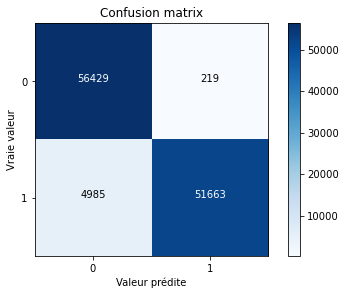

In [70]:
# Matrice de confusion pour notre modèle

y_test_pre = lgbm_model.predict(X_test_res)

cnf_matrix_tra = confusion_matrix(y_test_res, y_test_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title ='Confusion matrix')
plt.show()

Nous trouvons qu'avec le modèle du LGBMClassifier, nous trouvons 4985 faux positives et 219 faux négatives.

No Skill: ROC AUC = 0.500
RandomForest: ROC AUC = 0.976


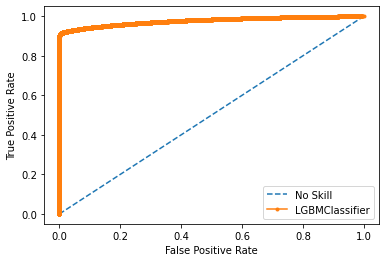

In [71]:
# ROC_AUC courbe pour notre modèle

ns_probs = [0 for _ in range(len(y_test_res))]
rf_probs = lgbm_model.predict_proba(X_test_res)
rf_probs = rf_probs[:, 1]
ns_auc = roc_auc_score(y_test_res, ns_probs)
rf_auc = roc_auc_score(y_test_res, rf_probs)
print('No Skill: ROC AUC = %.3f' % (ns_auc))
print('RandomForest: ROC AUC = %.3f' % (rf_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test_res, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test_res, rf_probs)
plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = 'No Skill')
plt.plot(rf_fpr, rf_tpr, marker = '.', label = 'LGBMClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

<h2><b>5) Amélioration du modèle</h2></b>

La prédiction des faux positives peut causer des pertes à l'entreprise. Dans notre cas, nous avons trouvé 4985 fausses positives et 219 fausses négatives avec notre modèle. De ce fait, nous allons définir un metrics personnalisé qui sera utilisé pour éviter la prédiction des fausses positives en pénalisant les faux positives. 

In [72]:
# Importation des libraries

from sklearn.metrics import make_scorer

Nous définissons le metrics personnalisé qui sera utilisé pour éviter la prédiction des faux positives.

In [73]:
# Définition du metrics personnalisé

def custom_metric(y_test, y_pred):
  cm = cnf_matrix_tra(y_test, y_pred)
  score = 1 - (((10*cm[1,0])+(cm[0,1]))/cm.sum())
  return score

custom_score = make_scorer(custom_metric, greater_is_better = True)

Ce metrics personnalisé est utilisé avec le modèle du LGBMClassifier pour identifier les hyperparamètres du modèle qui permettent d'éviter la prédiction des faux positives.

In [74]:
# RandomSearchCV pour identifier les hyperparamètres avec le metrics personnalisé

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 0.25, 0.5, 0.75, 1],
             'reg_lambda': [0, 0.25, 0.5, 0.75, 1]}            
lgbm_RandomGrid = RandomizedSearchCV(estimator = lgbm_model, param_distributions = param_test, cv = 5, verbose = 2,
                                   n_jobs = 4, scoring = custom_score)
lgbm_RandomGrid.fit(X_train_res, y_train_res)
print(lgbm_RandomGrid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


{'colsample_bytree': 0.9727085863460954, 'min_child_samples': 246, 'min_child_weight': 1e-05, 'num_leaves': 44, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 0.8095092324275501}


Avec les paramètres identifiées à l'aide du metrics personnalisé, nous utilisons le modèle amélioré afin de prédire la décision sur la demande de prêt d'argent.

In [75]:
# Modèle amélioré

lgbm_model = LGBMClassifier(colsample_bytree = 0.4334825329831787, min_child_samples = 288, min_child_weight = 0.01,
                            num_leaves = 40, reg_alpha = 0, reg_lambda = 0.75, subsample = 0.9722148582011172)
lgbm_model.fit(X_train_res, y_train_res)
y_pred = lgbm_model.predict(X_test_res)
y_train_pred = lgbm_model.predict(X_train_res)
print("Accuracy:", metrics.accuracy_score(y_test_res, y_pred))
print("Accuracy ROC:", metrics.roc_auc_score(y_test_res, y_pred))

Accuracy: 0.9545615026126253
Accuracy ROC: 0.9545615026126253


Recall metric in the train dataset: 91.24770512639458%


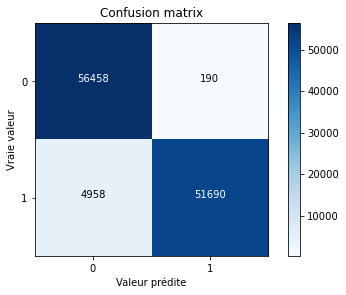

In [76]:
# Matrice de confusion pour notre modèle

y_test_pre = lgbm_model.predict(X_test_res)
cnf_matrix_tra = confusion_matrix(y_test_res, y_test_pre)
print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Ensuite, nous utiliserons le SHAP explainer afin de mieux interpéter le modèle.

In [77]:
# Importation des libraries

import shap

Nous consultons l'interprétation globale du modèle. Nous affichons les 20 variables qui ont la plus grande influence sur la prédiction de la variable de sortie 'TARGET'.

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


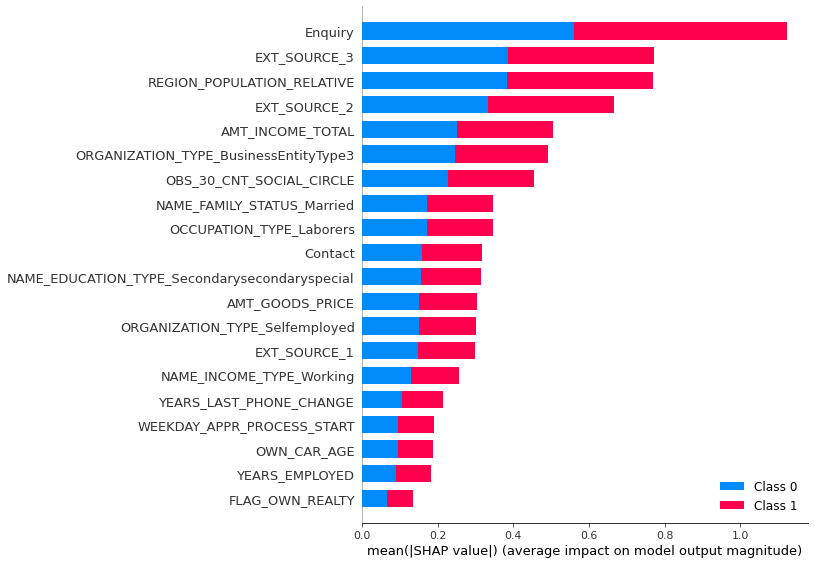

In [78]:
# Interprétation globale du modèle

explainer = shap.TreeExplainer(lgbm_model)
shap.initjs()
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, features=X, feature_names = X.columns, plot_type='bar')

Avec le SHAP explainer, nous pouvons aussi effectuer des interprétations locales. C'est à dire, nous pouvons identifier la rôle des variables sur la décision du modèle sur un client individuel. Nous montrons trois examples de ce type d'interprétation.

Les 3 clients qu'on étudiera sera le 1er, le 1000ème et le 2000ème client du dataframe 'app_tr'.

In [79]:
# L'interprétation locale du 1er client

shap.initjs()
idx = 0
print('Identification du client est', app_tr.iloc[idx]['SK_ID_CURR'])
print('La valeur du TARGET est', app_tr.iloc[idx]['TARGET'])
shap.force_plot(explainer.expected_value[1], shap_values[1][idx,:], X.iloc[idx,:])

Identification du client est 100002.0
La valeur du TARGET est 1.0


In [80]:
# L'interprétation locale du 500ème client

shap.initjs()
idx = 999
print('Identification du client est', app_tr.iloc[idx]['SK_ID_CURR'])
print('La valeur du TARGET est', app_tr.iloc[idx]['TARGET'])
shap.force_plot(explainer.expected_value[1], shap_values[1][idx,:], X.iloc[idx,:])

Identification du client est 101156.0
La valeur du TARGET est 0.0


In [81]:
# L'interprétation locale du 1000ème client

shap.initjs()
idx = 1999
print('Identification du client est', app_tr.iloc[idx]['SK_ID_CURR'])
print('La valeur du TARGET est', app_tr.iloc[idx]['TARGET'])
shap.force_plot(explainer.expected_value[1], shap_values[1][idx,:], X.iloc[idx,:])

Identification du client est 102343.0
La valeur du TARGET est 0.0


Le SHAP explainer peut être utilisé par les chargés des clients afin d'expliquer aux clients pourquoi la demande de prêt a été accordé ou pas. Pour le dashboard de l'application, il faudra que nous permettons la comparaison des clients avec les variables les plus importantes. Afin d'évaluer les 5 variables les plus importantes, nous utilisons les 'feature_importances_'. Ensuite, nous allons préparer des dataframes pour effectuer la comparaison avec des clients similaires (des clients qui ont réussi de rembourser le prêt d'argent et des clients qui n'ont pas).

Feature: CNT_CHILDREN, Score: 17.00000
Feature: AMT_INCOME_TOTAL, Score: 350.00000
Feature: AMT_CREDIT, Score: 73.00000
Feature: AMT_ANNUITY, Score: 81.00000
Feature: AMT_GOODS_PRICE, Score: 292.00000
Feature: REGION_POPULATION_RELATIVE, Score: 598.00000
Feature: YEARS_BIRTH, Score: 64.00000
Feature: YEARS_EMPLOYED, Score: 46.00000
Feature: YEARS_REGISTRATION, Score: 24.00000
Feature: YEARS_ID_PUBLISH, Score: 39.00000
Feature: OWN_CAR_AGE, Score: 138.00000
Feature: CNT_FAM_MEMBERS, Score: 66.00000
Feature: REGION_RATING_CLIENT_W_CITY, Score: 19.00000
Feature: REG_CITY_NOT_LIVE_CITY, Score: 2.00000
Feature: EXT_SOURCE_1, Score: 137.00000
Feature: EXT_SOURCE_2, Score: 114.00000
Feature: EXT_SOURCE_3, Score: 113.00000
Feature: OBS_30_CNT_SOCIAL_CIRCLE, Score: 173.00000
Feature: DEF_30_CNT_SOCIAL_CIRCLE, Score: 10.00000
Feature: OBS_60_CNT_SOCIAL_CIRCLE, Score: 74.00000
Feature: DEF_60_CNT_SOCIAL_CIRCLE, Score: 13.00000
Feature: YEARS_LAST_PHONE_CHANGE, Score: 84.00000
Feature: Enquiry, Sc

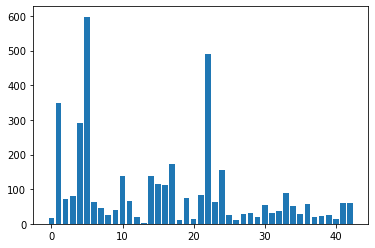

In [82]:
# Feature importance des modèles

importance = lgbm_model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0s, Score: %.5f' % (X.columns[i],v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Donc, les variables les plus importantes sont: 'EXT_SOURCE_2', 'Enquiry', 'Contact', 'NAME_FAMILY_STATUS_Married', 'OCCUPATION_TYPE_Laborers'. Maintenant, nous allons préparer des dataframes pour la comparaison avec des clients similaires.

In [83]:
# Création du dataframe 'app_tr_all' qui consiste des données de tous les clients 

imp_columns = ['SK_ID_CURR', 'EXT_SOURCE_2', 'Enquiry', 'Contact',
               'NAME_FAMILY_STATUS_Married', 'OCCUPATION_TYPE_Laborers', 'TARGET']
app_tr_all = app_tr[imp_columns]

# Création du dataframe 'app_tr_all' qui consiste des données des clients qui ont remboursé le prêt d'argent

app_tr_accord = app_tr_all[app_tr_all['TARGET'] == 0]
app_tr_accord = pd.DataFrame(app_tr_accord.describe())
app_tr_accord = app_tr_accord.iloc[3: , :]
app_tr_accord = app_tr_accord.rename(index={'min': '0th Quartile','25%': '1st Quartile', '50%': '2nd Quartile',
                                            '75%': '3rd Quartile', 'max': '4th Quartile' })
app_tr_accord.drop(['SK_ID_CURR', 'TARGET'], inplace = True, axis = 1)

# Création du dataframe 'app_tr_all' qui consiste des données des clients qui n'ont pas remboursé le prêt d'argent

app_tr_refus = app_tr_all[app_tr_all['TARGET'] == 1]
app_tr_refus = pd.DataFrame(app_tr_refus.describe())
app_tr_refus = app_tr_refus.iloc[3: , :]
app_tr_refus = app_tr_refus.rename(index={'min': '0th Quartile','25%': '1st Quartile', '50%': '2nd Quartile',
                                            '75%': '3rd Quartile', 'max': '4th Quartile' })
app_tr_refus.drop(['SK_ID_CURR', 'TARGET'], inplace = True, axis = 1)
app_tr_refus

,EXT_SOURCE_2,Enquiry,Contact,NAME_FAMILY_STATUS_Married,OCCUPATION_TYPE_Laborers
0th Quartile,-2.695549,-0.936627,-1.570747,0.0,0.0
1st Quartile,-1.442969,-0.936627,-0.413268,0.0,0.0
2nd Quartile,-0.384699,-0.063594,-0.413268,1.0,0.0
3rd Quartile,0.416165,0.372922,0.744212,1.0,0.0
4th Quartile,1.557956,8.666732,3.059172,1.0,1.0


<h2><b>6. Enregistrement des fichiers et des modèles

Dans cette section, nous allons enregistrer le modèle finale, le SHAP explainer et les dataframes que nous utiliserons dans l'application web.

In [84]:
# Importation de la librarie

import pickle

In [85]:
# Enregistrement du modèle

Pkl_Filename = "Pickle_LGBM_Model.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(lgbm_model, file)

In [86]:
# Enregistrement du SHAP values

filename_1 = 'shap_values.pkl'
pickle.dump(shap_values, open(filename_1, 'wb'))

# Enregistrement du SHAP expected values

expected_values = explainer.expected_value
filename_2 = 'expected_shap_values.pkl'
pickle.dump(expected_values, open(filename_2, 'wb'))

In [87]:
# Enregistrement des dataframes

app_tr_accord.to_csv('app_tr_accord.csv')
app_tr_refus.to_csv('app_tr_refus.csv')
app_tr_all.to_csv('app_tr_all.csv')
app_tr.to_csv('app_tr.csv')